# Hashtags study-Provax

## Import

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import repeat
import re

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import hashtag_util as ut
import sys
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets_proVax.csv',low_memory=False,
                 usecols=['hashtags','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags = pd.DataFrame()
dfHashtags['hashtags'] = listHashtags
dfHashtags['count'] = 0

dfHashtags = dfHashtags.groupby('hashtags').count()
dfHashtags.sort_values(['count'],axis = 0,inplace=True,ascending=False)

dfHashtags

,count
hashtags,
vaccino,32371
vaccini,26628
AstraZeneca,16243
COVID19,15841
coronavirus,9440
...,...
Tgrin60secondi,1
Tgtg,1
Thanks,1


In [5]:
dfUse = ut.process_dfUse(df)
dfUse

,Week/Year,hashtag,count
37790,2020-01-06,Bergamo,1
37809,2020-01-06,Zaia,1
37808,2020-01-06,WW3,1
37807,2020-01-06,VACCINI,2
37805,2020-01-06,Rompilatrasmissione,1
...,...,...,...
6407,2021-05-17,PalazzoBraschi,1
6408,2021-05-17,Palermo,2
6409,2021-05-17,Palestina,1
6437,2021-05-17,Quirinale,1


## General study

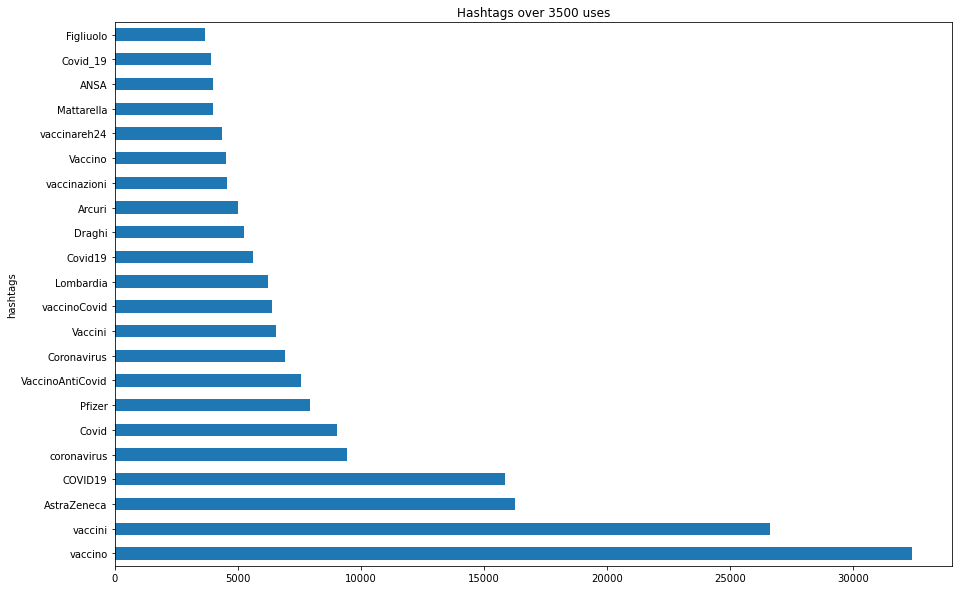

C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


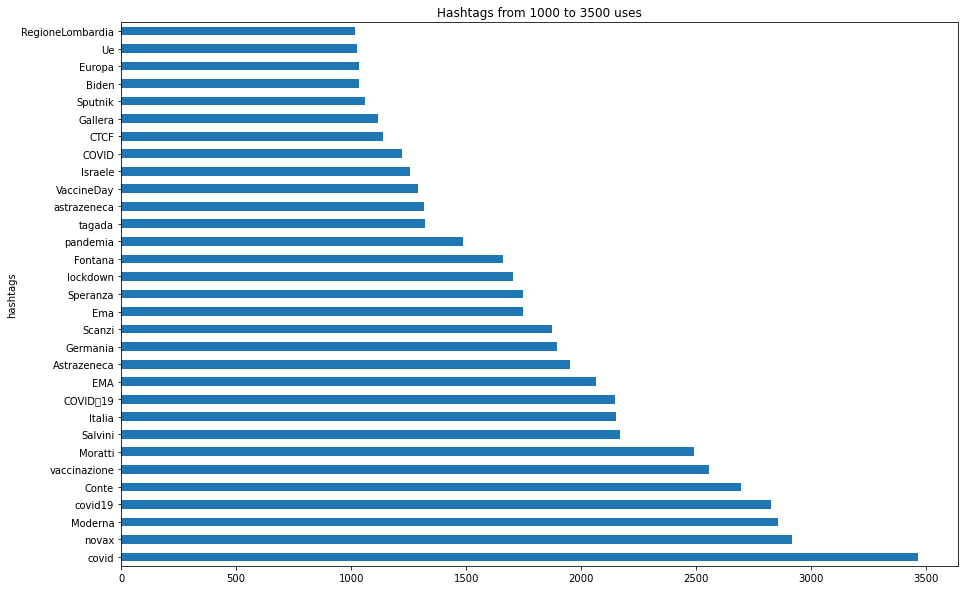

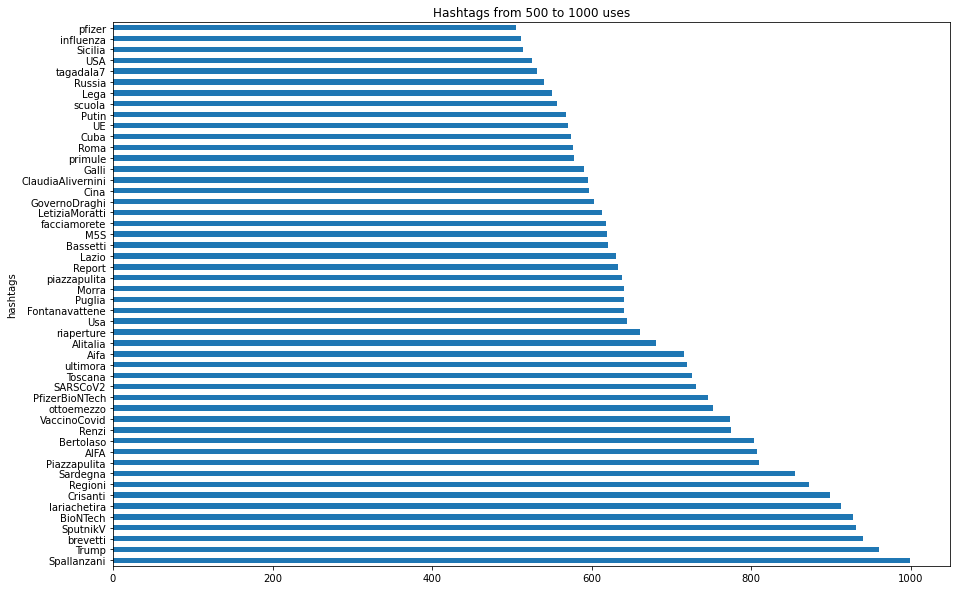

In [6]:
ut.visual_histogram(dfHashtags,3500,1000,500)

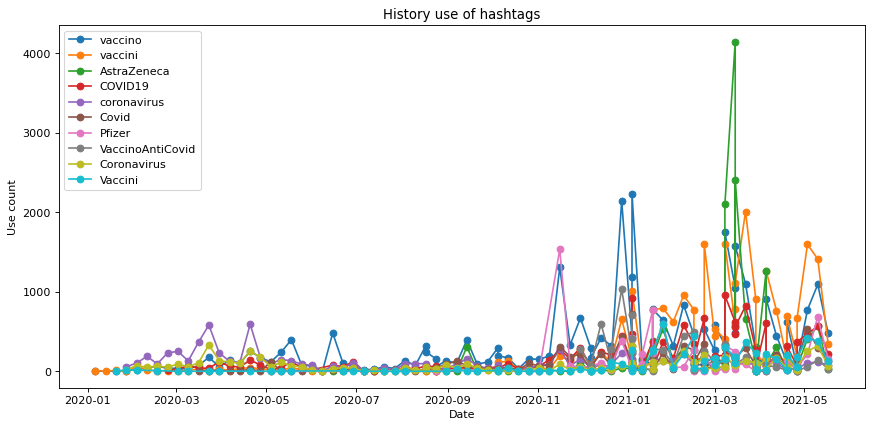

In [7]:
ut.visual_by_date_together(dfHashtags,dfUse)

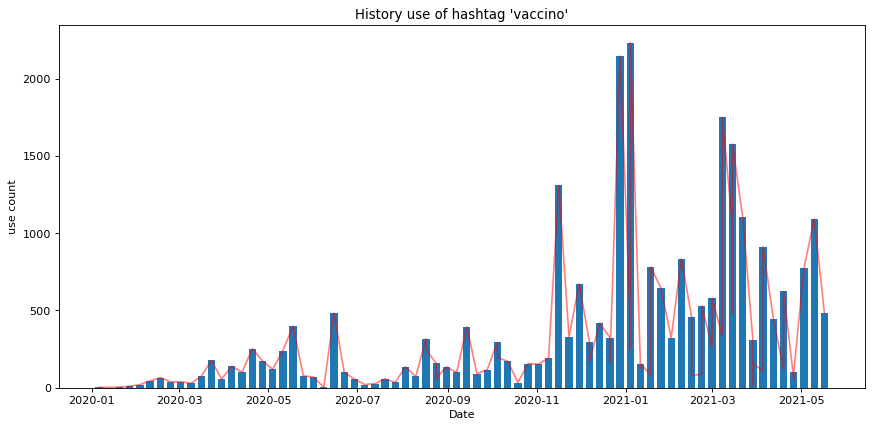

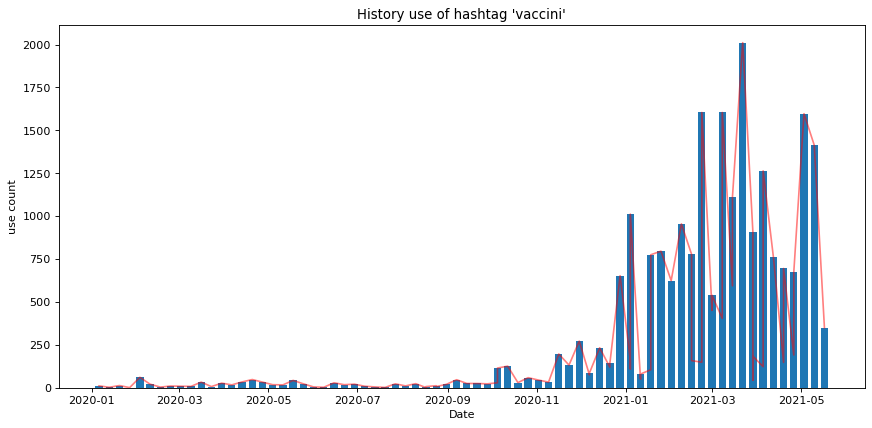

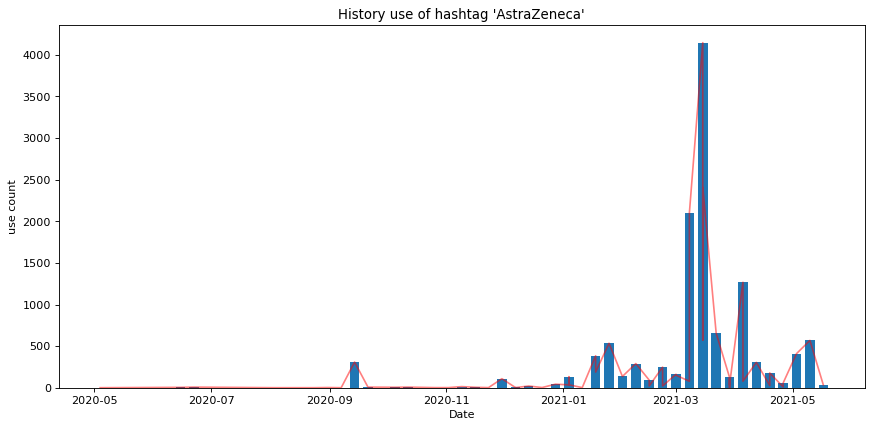

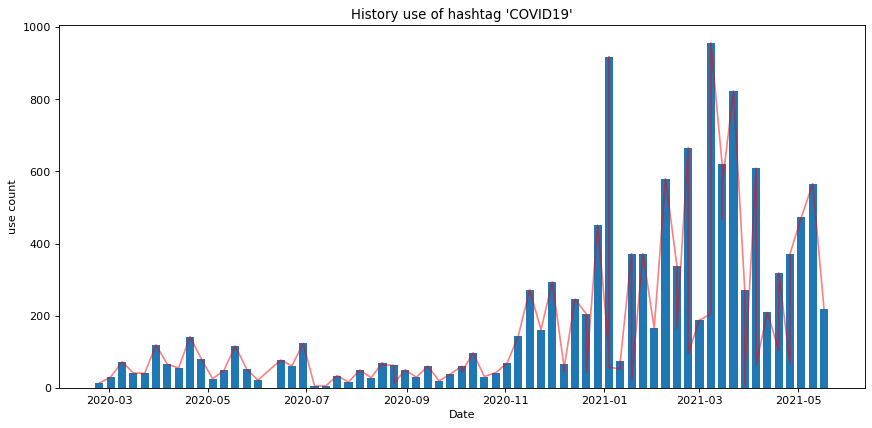

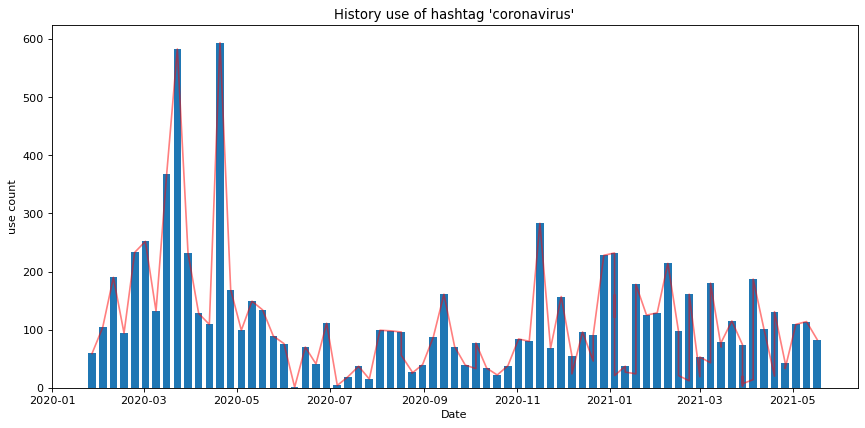

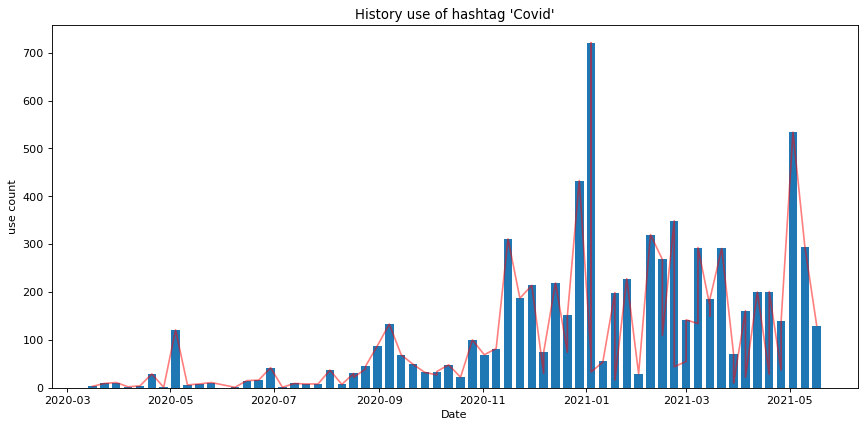

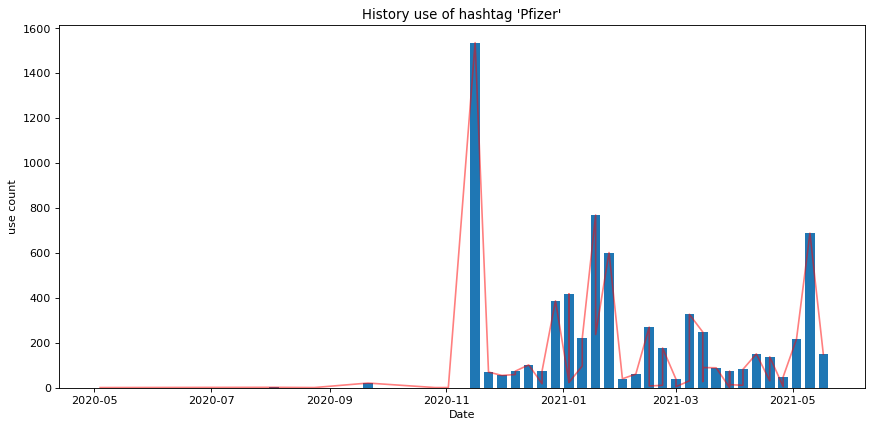

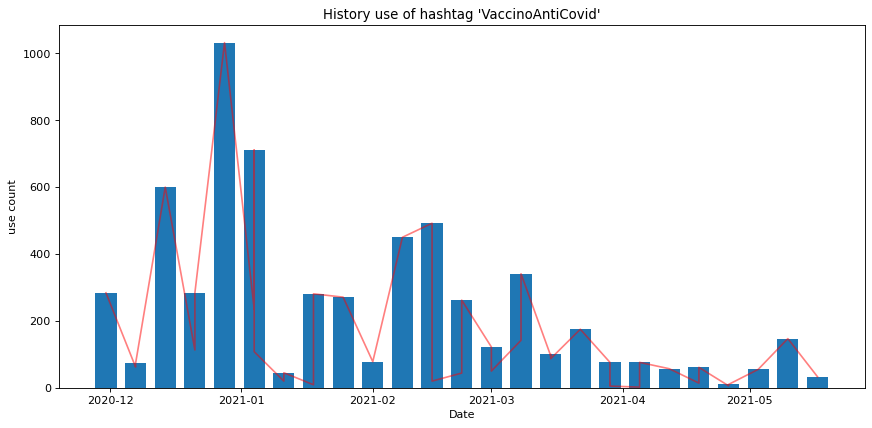

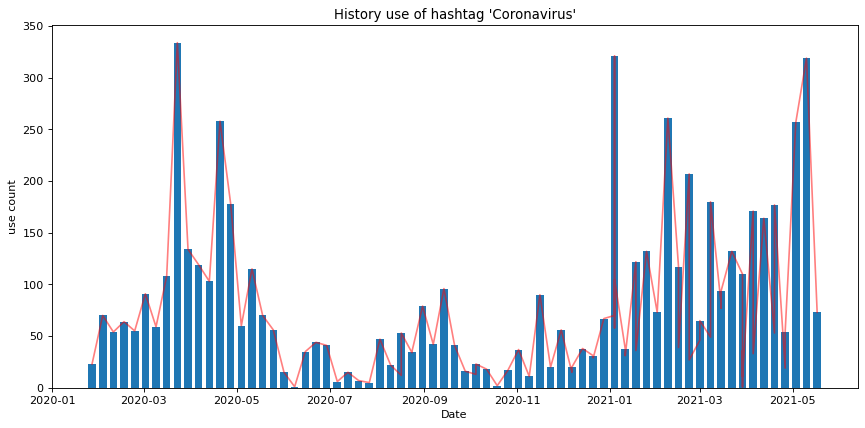

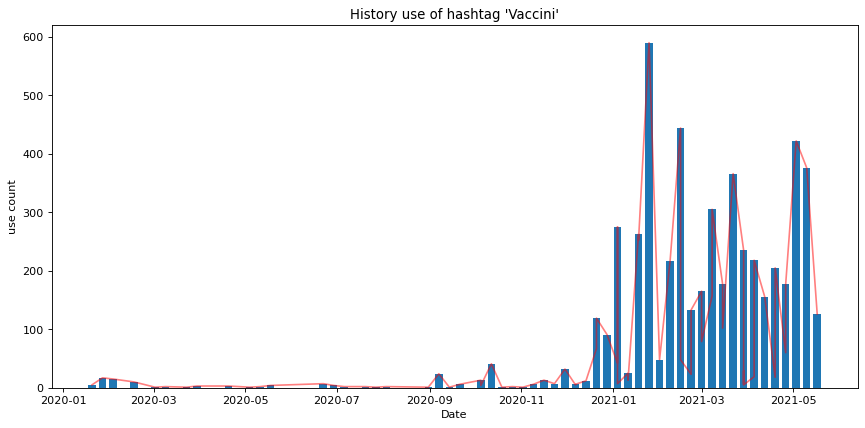

In [8]:
ut.visual_by_date_split(dfHashtags,dfUse)

## Study without some hastag

In [9]:
hastagRemove = ['vaccin.*','covid.*','corona.*','astrazeneca','pfizer','sarscov2','sputnikv','moderna']
dfHashtagFiltered = dfHashtags
for r in hastagRemove:
    mask = dfHashtagFiltered.index.str.lower().str.match(r) == True
    dfHashtagFiltered.drop(dfHashtagFiltered[mask].index, inplace=True)

dfHashtagFiltered

,count
hashtags,
Lombardia,6225
Draghi,5247
Arcuri,4992
Mattarella,4010
ANSA,3980
...,...
Tgrin60secondi,1
Tgtg,1
Thanks,1


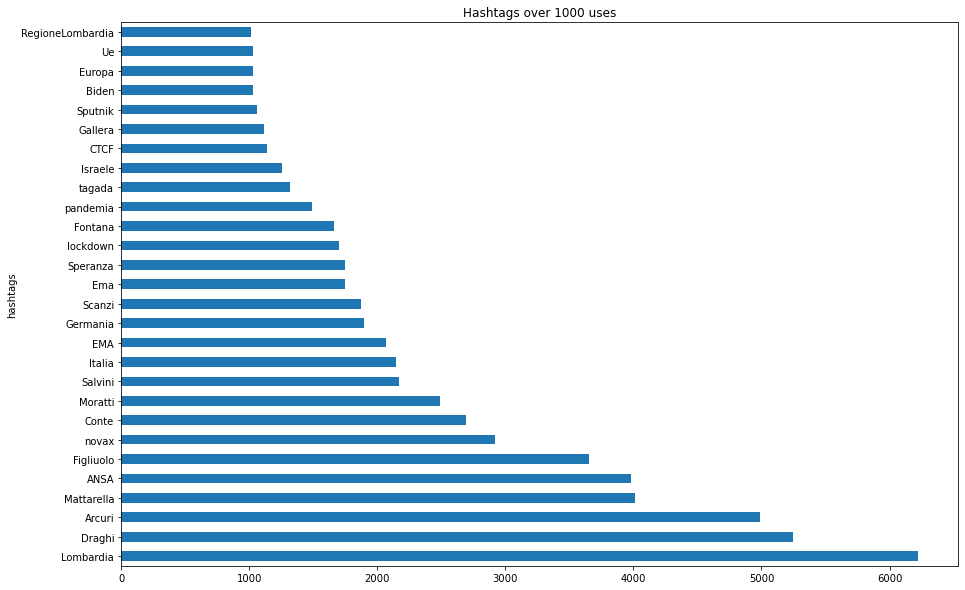

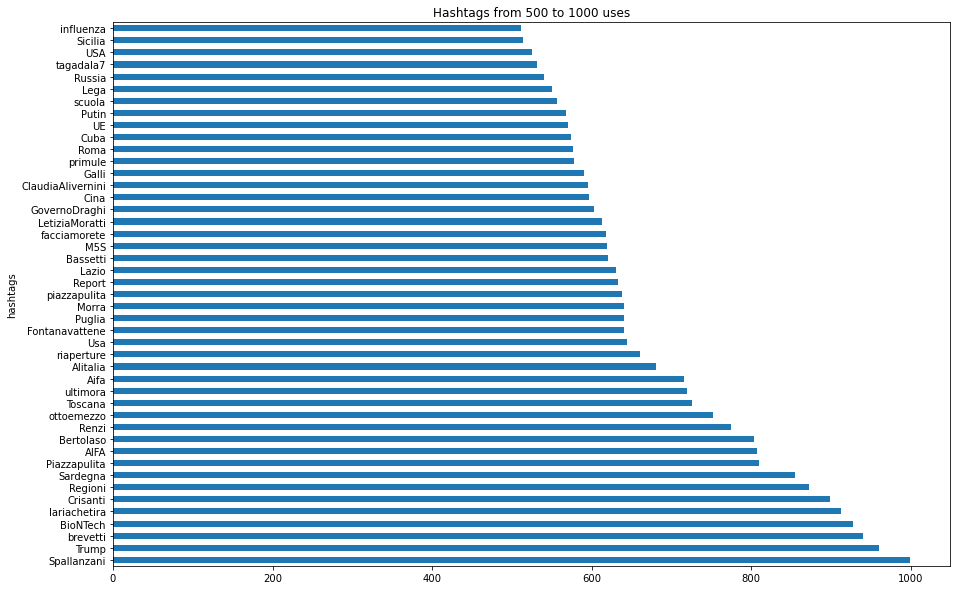

In [10]:
ut.visual_histogram(dfHashtagFiltered,1000,500)

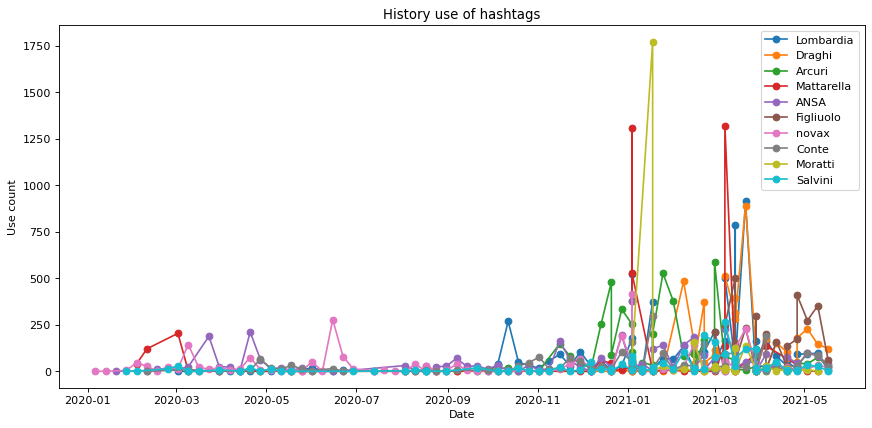

In [11]:
ut.visual_by_date_together(dfHashtagFiltered,dfUse)

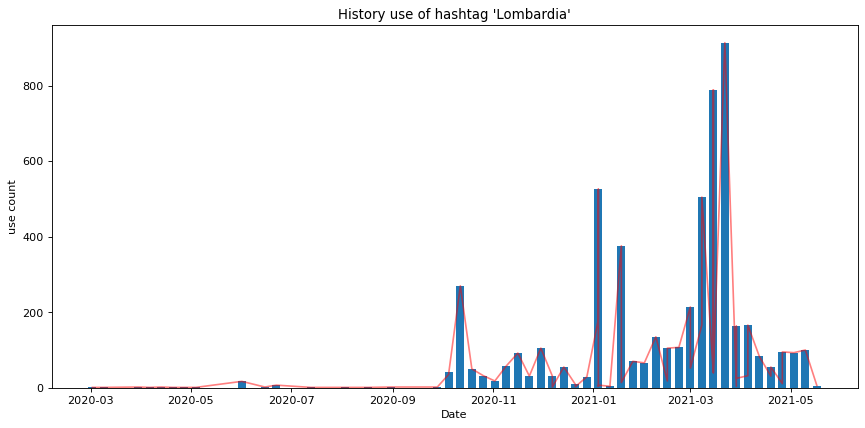

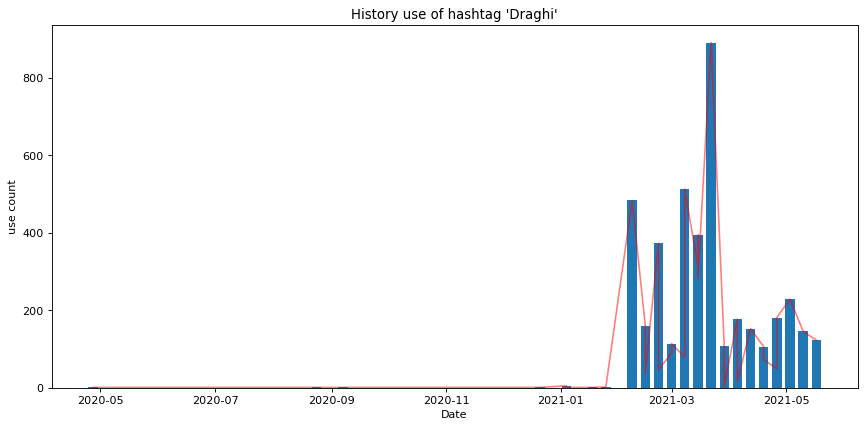

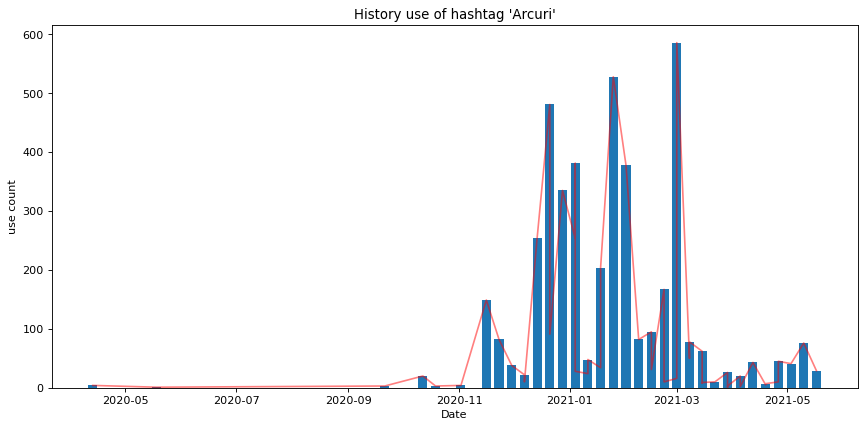

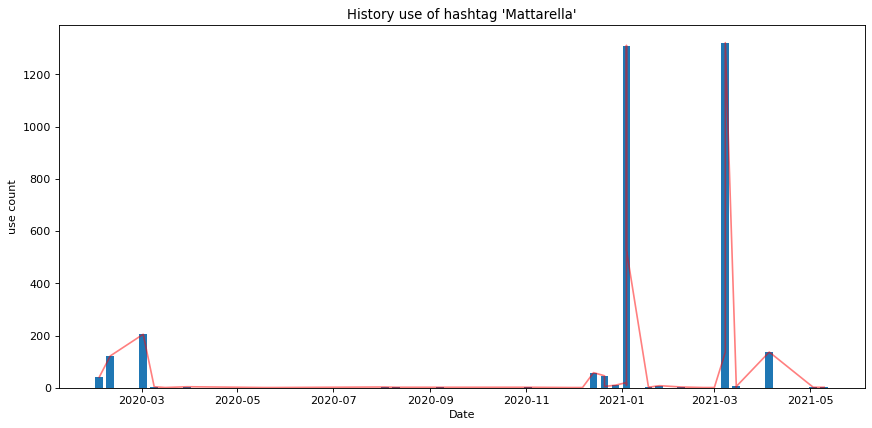

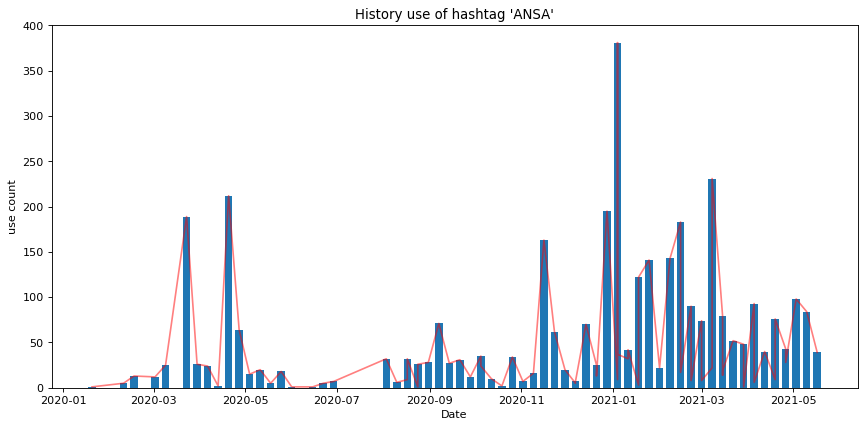

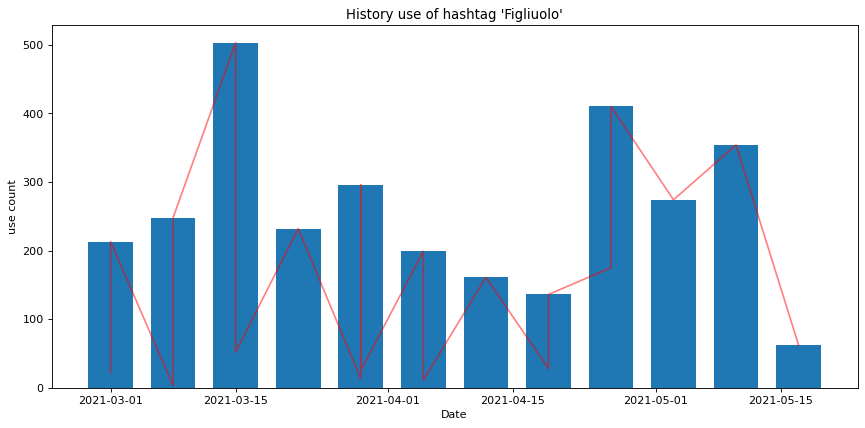

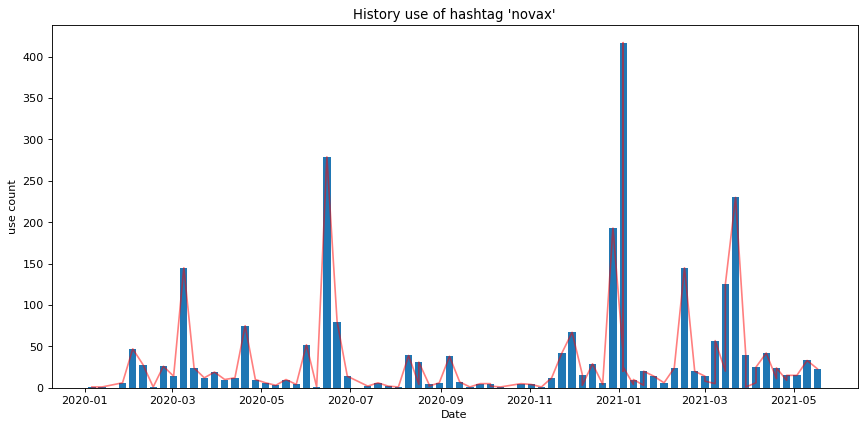

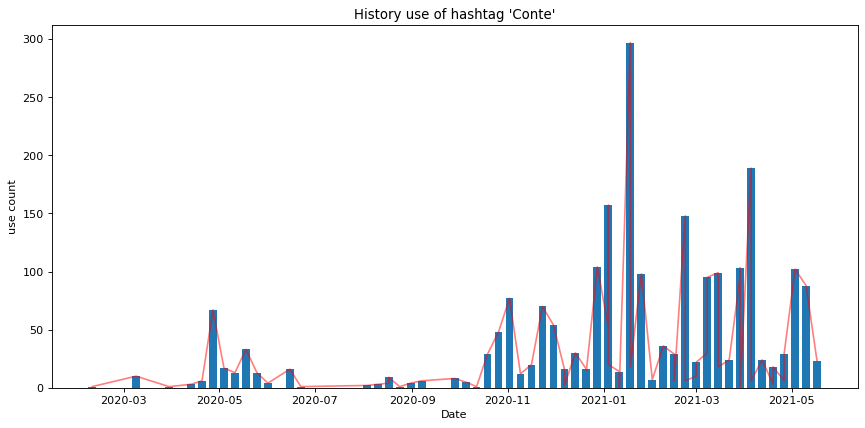

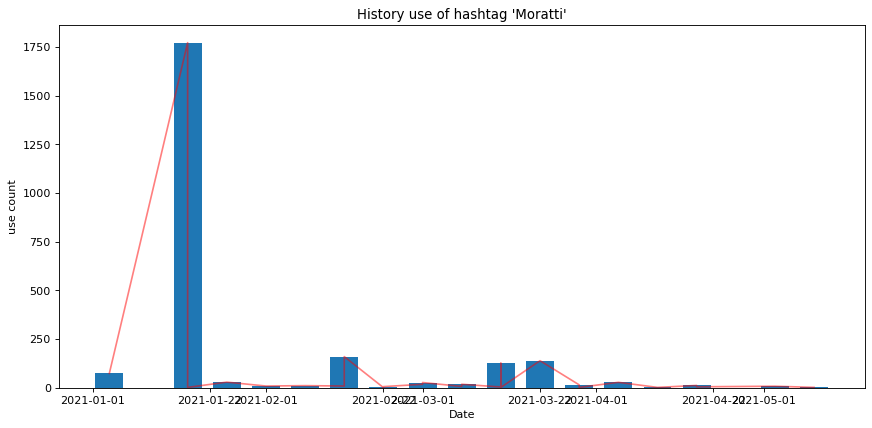

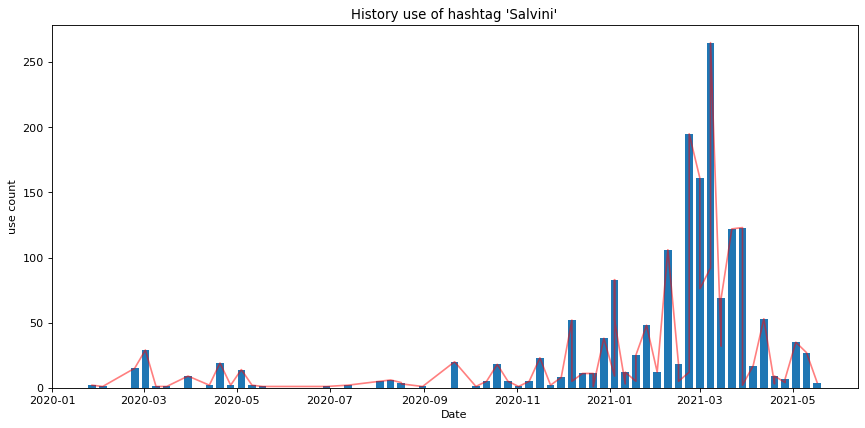

In [12]:
ut.visual_by_date_split(dfHashtagFiltered,dfUse)

## Study without some hastag and hastags about politic

In [13]:
dfMoreFiltered = dfHashtagFiltered
hastagRemove = ['.*lombardia.*','draghi','conte','m5s','mattarella','salvini','speranza','renzi','lega','.*governo.*',
           '.*moratti.*','zingaretti','scanzi','burioni','crisanti']
for r in hastagRemove:
    mask = dfMoreFiltered.index.str.lower().str.match(r) == True
    dfMoreFiltered.drop(dfMoreFiltered[mask].index, inplace=True)

dfMoreFiltered

,count
hashtags,
Arcuri,4992
ANSA,3980
Figliuolo,3652
novax,2916
Italia,2149
...,...
Tgrin60secondi,1
Tgtg,1
Thanks,1


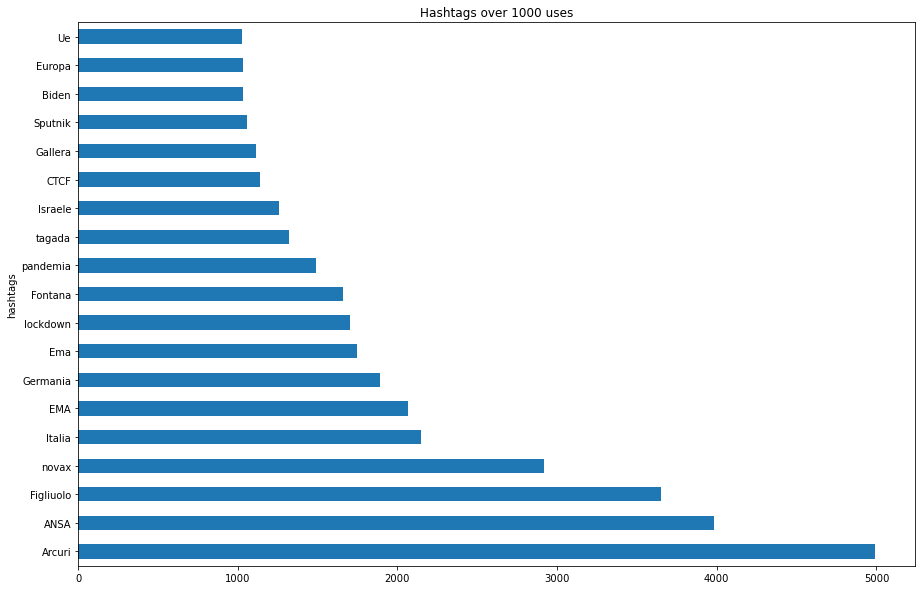

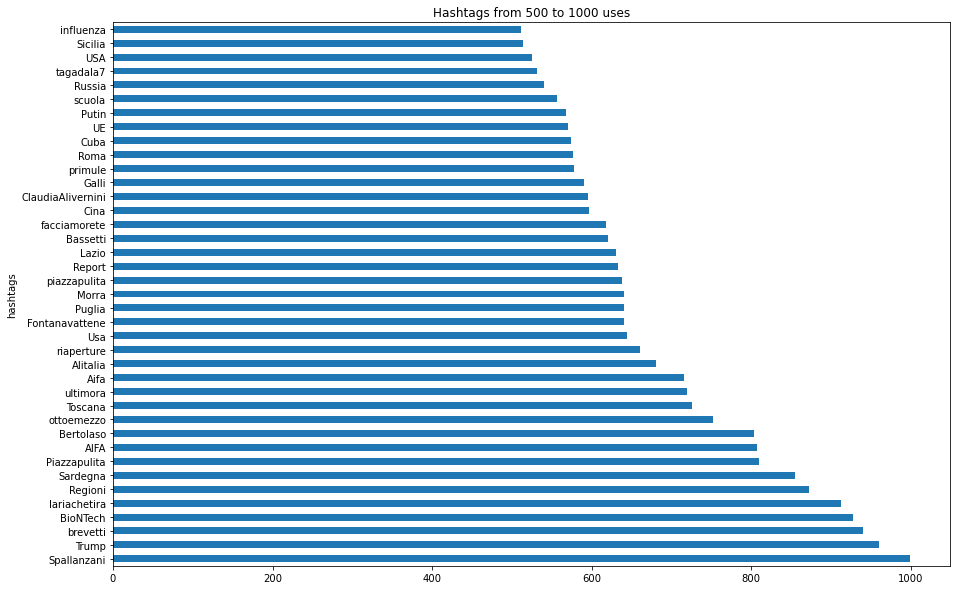

In [14]:
ut.visual_histogram(dfMoreFiltered,1000,500)

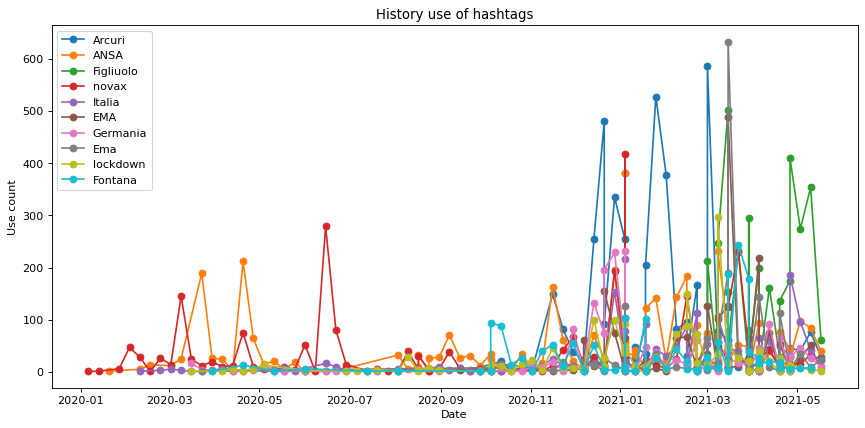

In [15]:
ut.visual_by_date_together(dfMoreFiltered,dfUse)

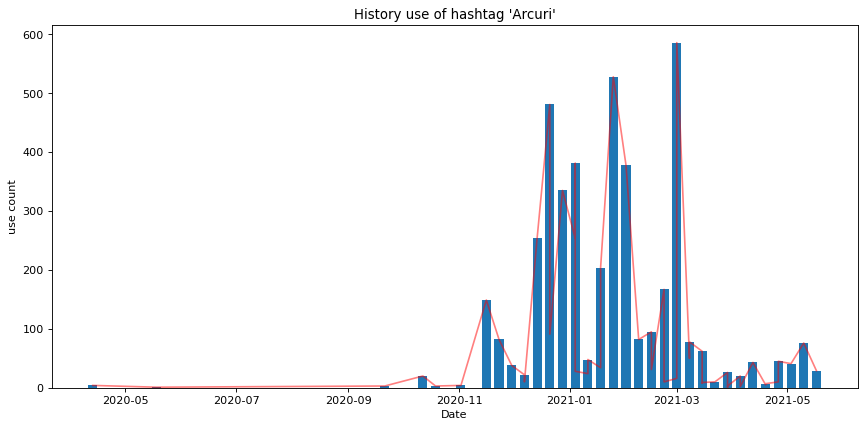

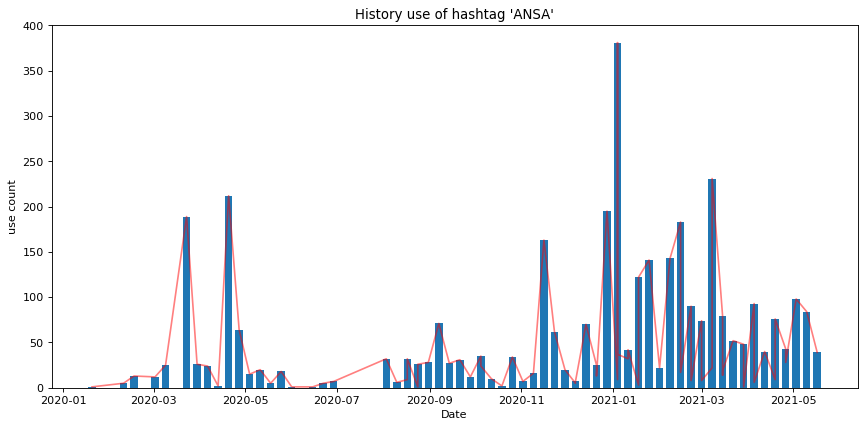

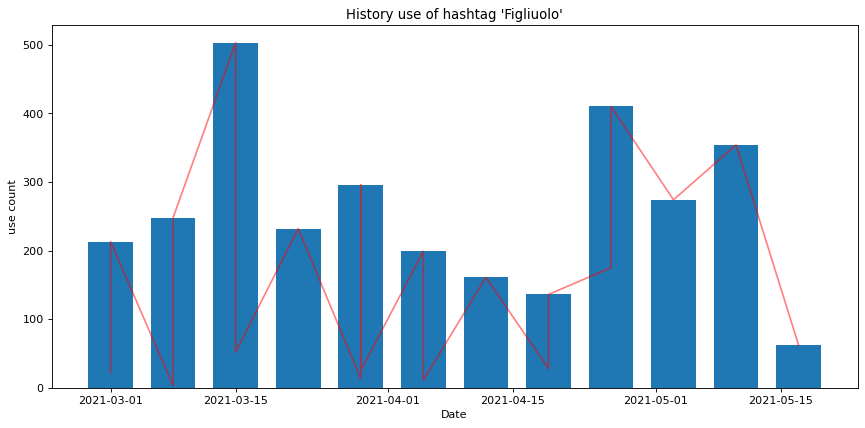

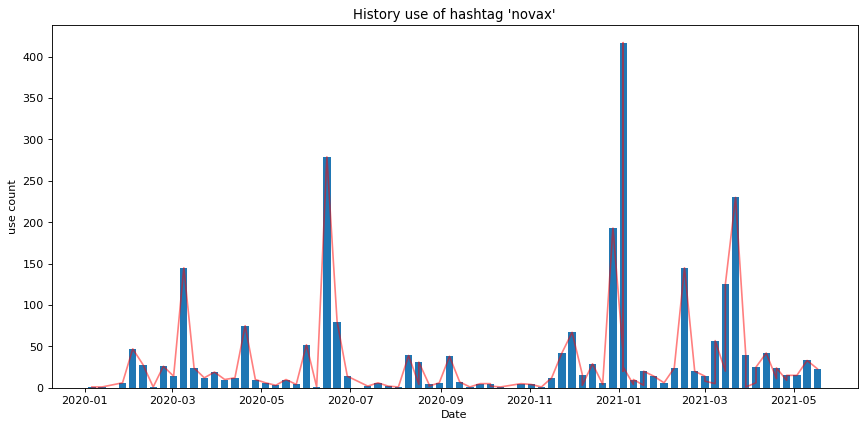

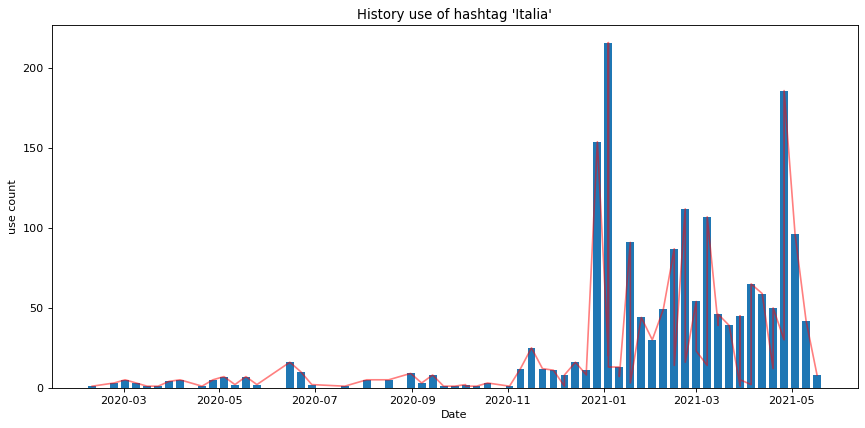

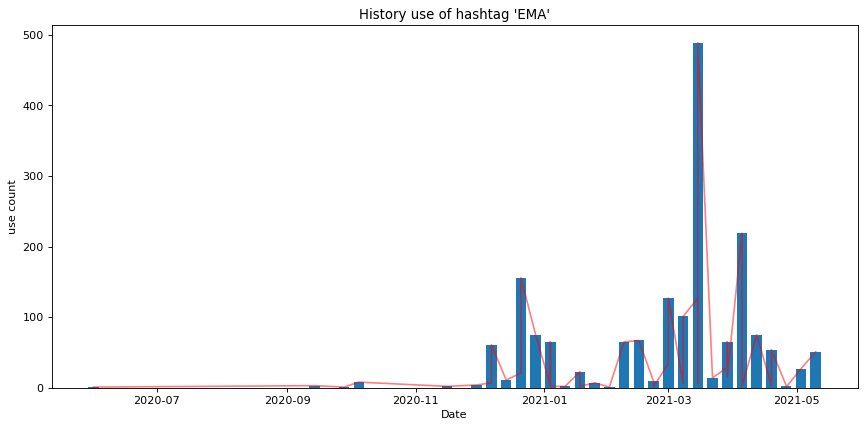

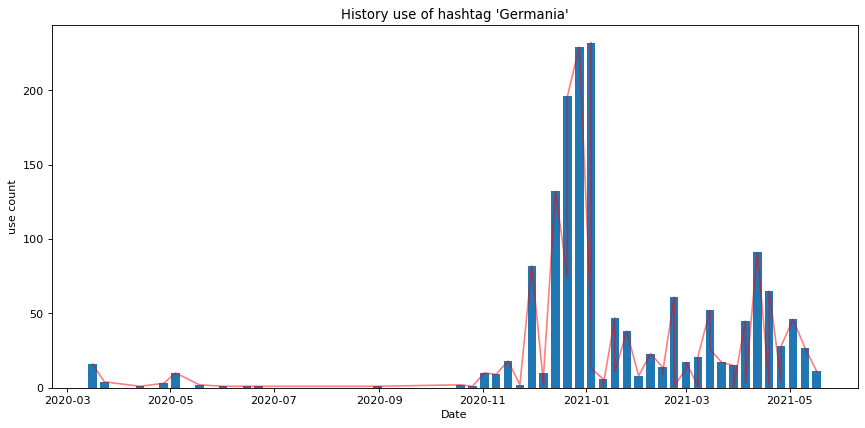

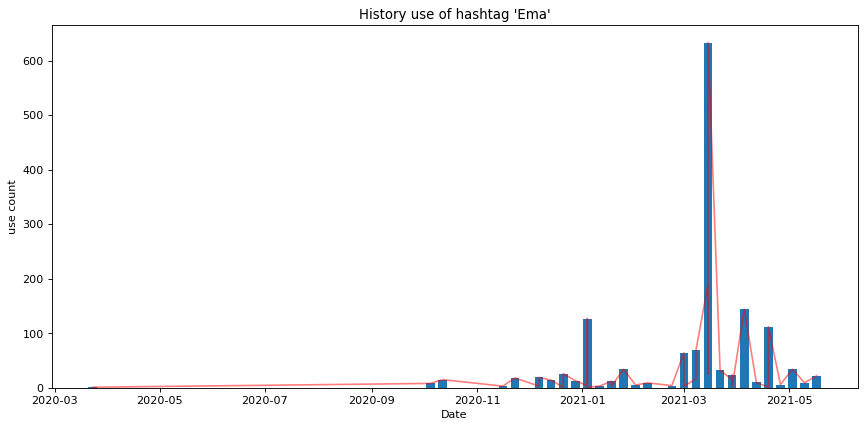

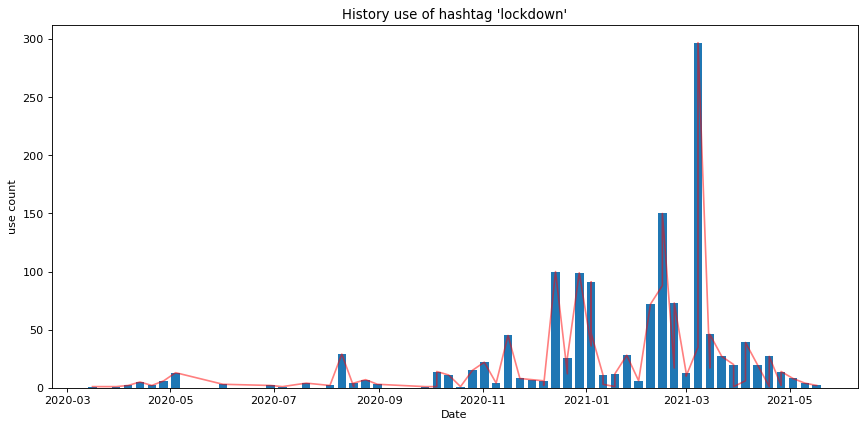

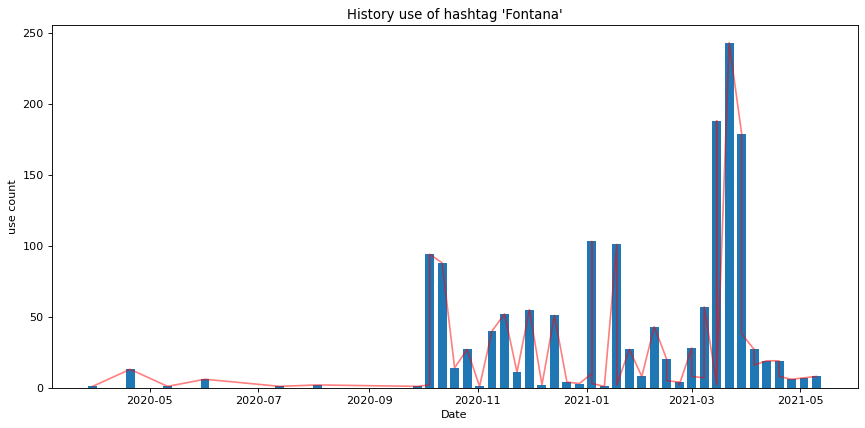

In [16]:
ut.visual_by_date_split(dfMoreFiltered,dfUse)

## Use of 'suspect' hashtag

In [17]:
listHashtagsStudy = ['5g','billgates','dittatura*.','disobbedisco','nessunacorrelazione','byoblu*.']

In [18]:
dfSuspect = pd.DataFrame(index=listHashtagsStudy)
for r in listHashtagsStudy:
    mask = dfMoreFiltered.index.str.lower().str.match(r) == True
    dfSuspect.loc[r,'count'] = sum(dfMoreFiltered.loc[mask,'count'])
dfSuspect.sort_values('count',inplace=True)

<AxesSubplot:title={'center':'Number of person that uses a "suspicious" hashtag'}>

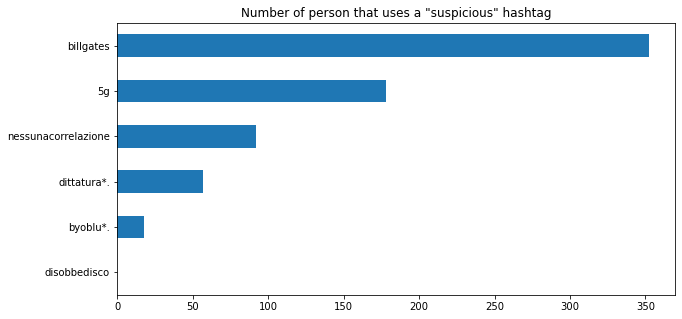

In [19]:
dfSuspect.plot.barh(figsize=(10,5),legend=None,title='Number of person that uses a "suspicious" hashtag')

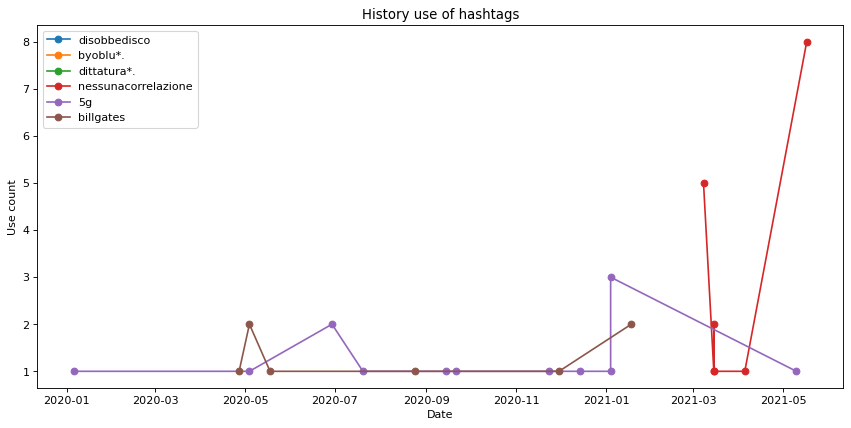

In [20]:
ut.visual_by_date_together(dfSuspect,dfUse)

### Control user that uses suspect hashtag

In [21]:
df = pd.read_csv('../tweets_proVax.csv',low_memory=False,
                 usecols=['hashtags','user_screen_name'])
df

,user_screen_name,hashtags
0,TestPerTutti,[]
1,CapitanHarlok6,[]
2,Pattyjune22,[]
3,FrancyP_,[]
4,lantifragile,[]
...,...,...
840266,GustavoMichele6,[]
840267,BansCollector,[]
840268,TgrRai,"[{'text': 'vaccino', 'indices': [18, 26]}, {'t..."
840269,OvileItalia,"[{'text': 'ilmanifesto', 'indices': [34, 46]},..."


In [22]:
dfUseSus = ut.process_df_uses_hashtags(df,dfSuspect.index)
dfUseSus = dfUseSus.groupby('user').any()

dfUseSus = ut.hashtagAND(dfSuspect.index,dfUseSus)

for i in range(1,len(listHashtagsStudy)):
    dfUseSus = ut.hashtagOR(dfSuspect.index,dfUseSus,'OR'+str(i),i)

dfUseSus

,disobbedisco,byoblu*.,dittatura*.,nessunacorrelazione,5g,billgates,AND,OR1,OR2,OR3,OR4,OR5
user,,,,,,,,,,,,
009mattiaa,False,False,False,False,False,False,False,False,False,False,False,False
014pelletterie,False,False,False,False,False,False,False,False,False,False,False,False
03Ginevra,False,False,False,False,False,False,False,False,False,False,False,False
04_remo,False,False,False,False,False,False,False,False,False,False,False,False
089Silvy,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
zombiepinscher,False,False,False,False,False,False,False,False,False,False,False,False
zonaTv,False,False,False,False,False,False,False,False,False,False,False,False
zoppi_carla,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
print("Number of account high credibility that uses at least i hashtags")
for i in range (1,6):
    or_i = "OR%d"%i
    dfUseHashtagNovax = dfUseSus[dfUseSus[or_i]]
    print("\ti =",i,":\t",(len(dfUseHashtagNovax) / len(dfUseSus))*100,"%")

Number of account high credibility that uses at least i hashtags
	i = 1 :	 4.89162272993556 %
	i = 2 :	 0.5467682093341144 %
	i = 3 :	 0.019527436047646944 %
	i = 4 :	 0.0 %
	i = 5 :	 0.0 %
